In [3]:
#https://plotly.com/~jackp/18301.embed
#https://plotly.com/~jackp/17520.embed
#https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af

In [4]:
import obspy
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from plotly.offline import init_notebook_mode,iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

import plotly.graph_objects as go
import pandas as pd
import datashader as ds

import xarray as xr
import plotly.express as px

In [6]:
gdata=np.load(os.getcwd()+"/gain_data_f64.npy",allow_pickle=True)

In [7]:

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/uber-rides-data1.csv')
df = pd.DataFrame(gdata)
#dff = df.query('Lat < 40.82').query('Lat > 40.70').query('Lon > -74.02').query('Lon < -73.91')
df.head()

0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.120221  0.082752  0.064655  0.052669  0.040646  0.039181  0.037672   
2  0.464350  0.322721  0.259221  0.208463  0.157556  0.152674  0.147605   
3  1.007611  0.707483  0.584602  0.464057  0.343181  0.334399  0.325174   
4  1.725259  1.224633  1.041699  0.816121  0.589964  0.578270  0.565750   

        7         8         9    ...       638       639       640       641  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.047615  0.057556  0.062745  ...  0.057102  0.067291  0.063430  0.067403   
2  0.188080  0.228543  0.249370  ...  0.226284  0.266853  0.251456  0.267211   
3  0.417825  0.510446  0.557466  ...  0.504360  0.595222  0.560687  0.595826   
4  0.733283  0.900761  0.984634  ...  0.888148  1.048942  0.987733  1.049656   

        642       643       644       645       646       647  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.071993  0.068885  0.068001  0.064731  0.061878  0.062848  
2  0.285430  0.272989  0.269646  0.256543  0.245103  0.249081  
3  0.636500  0.608487  0.601402  0.571867  0.546059  0.555232  
4  1.121400  1.071555  1.059740  1.007137  0.961134  0.977840  

[5 rows x 648 columns]

In [8]:
t=["chan_"+str(i) for i in range(0,648)]


In [9]:
samples=np.linspace(0,5600,5601,retstep=False)
samples

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         5.59800000e+03,   5.59900000e+03,   5.60000000e+03])

In [10]:

df.columns=t
df["samples"]=samples
df.tail()

chan_0         chan_1         chan_2         chan_3  \
5596  175972.925742   14486.747614 -175777.414743 -361922.839200   
5597  239911.544955   65682.815870 -139699.194972 -346583.225249   
5598  303895.768244  116915.444310 -103595.145217 -331232.527437   
5599  367925.634505  168184.654652  -67465.264046 -315870.766571   
5600  432001.175092  219490.465714  -31309.547445 -300497.955227   

             chan_4         chan_5         chan_6        chan_7        chan_8  \
5596 -115913.361302  150770.382375  160427.810936  74257.016414 -11920.779665   
5597 -119795.346076  149069.374600  160386.155267  74376.167345 -11641.039878   
5598 -123680.062456  147367.098613  160344.413115  74495.377116 -11361.096079   
5599 -127567.520649  145663.564972  160302.596426  74614.651314 -11080.949044   
5600 -131457.727792  143958.780573  160260.713164  74733.993673 -10800.599268   

            chan_9  ...       chan_639      chan_640      chan_641  \
5596   5993.102383  ... -291703.838691  47963.905296  69907.177941   
5597  -5707.771292  ... -147489.173367   -910.198760  47280.077838   
5598 -17417.004095  ...   -3171.374936 -49819.236292  24636.787463   
5599 -29134.600298  ...   -3205.692577 -50611.461571  26053.183833   
5600 -40860.563737  ...   -3240.034009 -51404.241426  27470.586459   

          chan_642       chan_643       chan_644       chan_645      chan_646  \
5596 -54060.246241 -111543.813923 -169027.382560 -128413.360967 -87799.342305   
5597 -53268.068251 -110815.682144 -168363.297007 -128396.442194 -88429.589891   
5598 -52475.305354 -110086.990873 -167698.677378 -128379.465926 -89060.256565   
5599 -51681.961261 -109357.748134 -167033.536010 -128362.441733 -89691.349128   
5600 -50888.038382 -108627.959218 -166367.881072 -128345.375996 -90322.872170   

          chan_647  samples  
5596 -86154.784951   5596.0  
5597 -86695.297293   5597.0  
5598 -87236.165213   5598.0  
5599 -87777.395354   5599.0  
5600 -88318.992192   5600.0  

[5 rows x 649 columns]

In [11]:
df.values.shape

(5601, 649)

In [12]:
#https://towardsdatascience.com/basic-data-structures-of-xarray-80bab8094efa
times=np.linspace(0,5600,5601)
channels=np.linspace(0,647,648)
#df.loc[:, df.columns != 'b']
arr=xr.Dataset({
    "amplitudes":(("time","channels"),df.loc[:,df.columns!='samples'].values)
    
},
    {
    "time":times, "channels":channels
},
)
# arr['chan_0'] = (('time','offset'),np.random.random(size=(10,2)))#.reshape(-1))
# arr['chan_1'] = (('time','offset'),np.random.random(size=(10,2)))#.reshape(-1))


In [13]:
arr

<xarray.Dataset>
Dimensions:     (channels: 648, time: 5601)
Coordinates:
  * time        (time) float64 0.0 1.0 2.0 3.0 ... 5.598e+03 5.599e+03 5.6e+03
  * channels    (channels) float64 0.0 1.0 2.0 3.0 ... 644.0 645.0 646.0 647.0
Data variables:
    amplitudes  (time, channels) float64 0.0 0.0 0.0 ... -9.032e+04 -8.832e+04

In [14]:
type(arr["amplitudes"])

xarray.core.dataarray.DataArray

In [16]:
#cvs=ds.Canvas(plot_width=1000,plot_height=1000)
%time
import datashader.transfer_functions as tf
img=tf.shade(arr["amplitudes"],cmap='gray')
print(type(img))
print(img.shape)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
<class 'datashader.transfer_functions.Image'>
(5601, 648)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


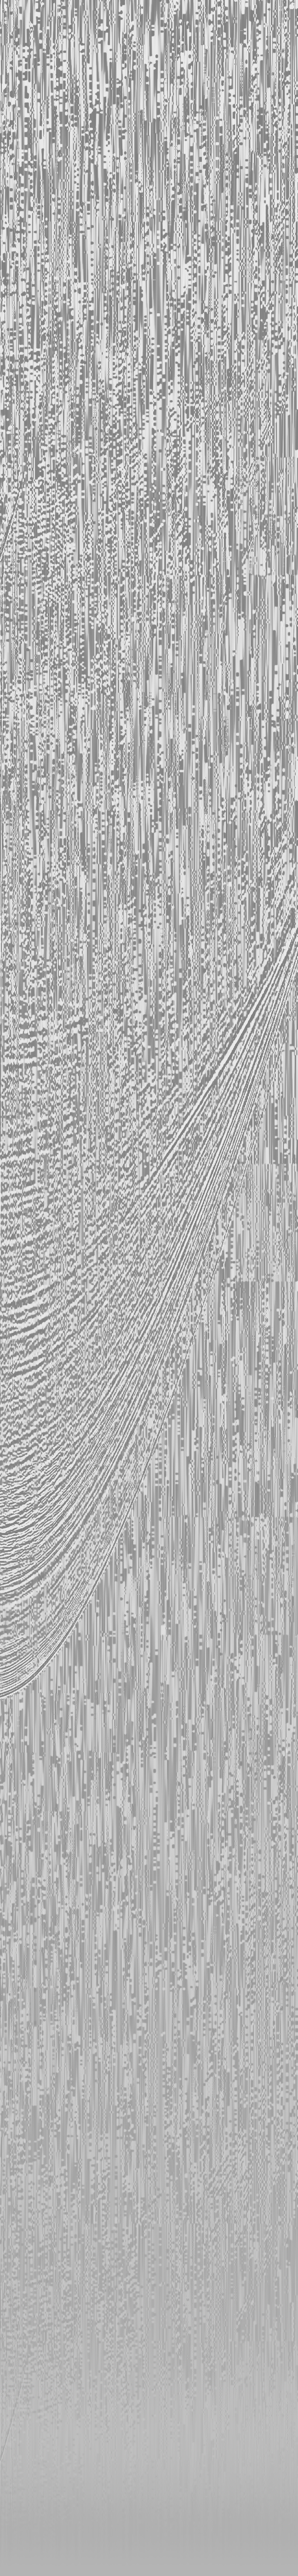

In [17]:
%time
img

In [18]:
type(img)

datashader.transfer_functions.Image

In [26]:
xdf=arr.to_dataframe()
xdf.head()

amplitudes
channels time            
0.0      0.0     0.000000
         1.0     0.120221
         2.0     0.464350
         3.0     1.007611
         4.0     1.725259

In [27]:
df.head()

chan_0    chan_1    chan_2    chan_3    chan_4    chan_5    chan_6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.120221  0.082752  0.064655  0.052669  0.040646  0.039181  0.037672   
2  0.464350  0.322721  0.259221  0.208463  0.157556  0.152674  0.147605   
3  1.007611  0.707483  0.584602  0.464057  0.343181  0.334399  0.325174   
4  1.725259  1.224633  1.041699  0.816121  0.589964  0.578270  0.565750   

     chan_7    chan_8    chan_9  ...  chan_639  chan_640  chan_641  chan_642  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.047615  0.057556  0.062745  ...  0.067291  0.063430  0.067403  0.071993   
2  0.188080  0.228543  0.249370  ...  0.266853  0.251456  0.267211  0.285430   
3  0.417825  0.510446  0.557466  ...  0.595222  0.560687  0.595826  0.636500   
4  0.733283  0.900761  0.984634  ...  1.048942  0.987733  1.049656  1.121400   

   chan_643  chan_644  chan_645  chan_646  chan_647  samples  
0  0.000000  0.000000  0.000000  0.000000  0.000000      0.0  
1  0.068885  0.068001  0.064731  0.061878  0.062848      1.0  
2  0.272989  0.269646  0.256543  0.245103  0.249081      2.0  
3  0.608487  0.601402  0.571867  0.546059  0.555232      3.0  
4  1.071555  1.059740  1.007137  0.961134  0.977840      4.0  

[5 rows x 649 columns]

In [50]:
xdf.tail()

amplitudes
channels time                
647.0    5596.0 -86154.784951
         5597.0 -86695.297293
         5598.0 -87236.165213
         5599.0 -87777.395354
         5600.0 -88318.992192

In [54]:
xdf.index.get_level_values?

In [65]:
xdf_sub=xdf.iloc[xdf.index.get_level_values("channels")==647]
xdf_sub.tail()

amplitudes
channels time                
647.0    5596.0 -86154.784951
         5597.0 -86695.297293
         5598.0 -87236.165213
         5599.0 -87777.395354
         5600.0 -88318.992192

In [94]:
xdf_sub=xdf.iloc[:,:]
xdf_sub

amplitudes  samples
channels time                         
0.0      0.0         0.000000      0.0
         1.0         0.120221      1.0
         2.0         0.464350      2.0
         3.0         1.007611      3.0
         4.0         1.725259      4.0
...                       ...      ...
647.0    5596.0 -86154.784951   5596.0
         5597.0 -86695.297293   5597.0
         5598.0 -87236.165213   5598.0
         5599.0 -87777.395354   5599.0
         5600.0 -88318.992192   5600.0

[3629448 rows x 2 columns]

In [95]:
#can be parallized
sample_list=[]
for c in range(0,648):
    tmp=xdf_sub.iloc[xdf_sub.index.get_level_values("channels")==c]
    sample_list.append(tmp.index.get_level_values("time").map(lambda x:x))
    

np_s=np.array(sample_list)


samples=np_s.reshape(-1)

assert samples.shape[0]==xdf_sub.shape[0]

xdf_sub["samples"]=samples

xdf_sub.tail()

amplitudes  samples
channels time                         
647.0    5596.0 -86154.784951   5596.0
         5597.0 -86695.297293   5597.0
         5598.0 -87236.165213   5598.0
         5599.0 -87777.395354   5599.0
         5600.0 -88318.992192   5600.0

In [ ]:
#can be parallized
channel_list=[]
for t in range(0,5601):
    tmp=xdf_sub.iloc[xdf_sub.index.get_level_values("time")==t]
    channel_list.append(tmp.index.get_level_values("channels").map(lambda x:x))
    

In [ ]:
np_r=np.array(channel_list)

In [ ]:
receivers=np_r.reshape(-1)
receivers.shape

In [96]:
assert receivers.shape[0]==xdf_sub.shape[0]

xdf_sub["receiver"]=receivers

xdf_sub.tail()

ValueError: Length of values does not match length of index

In [47]:
to_bin=lambda x: x

=xdf.index.get_level_values("time").map(to_bin)

/anaconda/envs/data_processing/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
xdf_sub.tail()

amplitudes  sample
channels time                      
0.0      647.0  1232.569568  5596.0
         647.0  1232.569568  5597.0
         647.0  1232.569568  5598.0
         647.0  1232.569568  5599.0
         647.0  1232.569568  5600.0

In [29]:
df.tail()

chan_0         chan_1         chan_2         chan_3  \
5596  175972.925742   14486.747614 -175777.414743 -361922.839200   
5597  239911.544955   65682.815870 -139699.194972 -346583.225249   
5598  303895.768244  116915.444310 -103595.145217 -331232.527437   
5599  367925.634505  168184.654652  -67465.264046 -315870.766571   
5600  432001.175092  219490.465714  -31309.547445 -300497.955227   

             chan_4         chan_5         chan_6        chan_7        chan_8  \
5596 -115913.361302  150770.382375  160427.810936  74257.016414 -11920.779665   
5597 -119795.346076  149069.374600  160386.155267  74376.167345 -11641.039878   
5598 -123680.062456  147367.098613  160344.413115  74495.377116 -11361.096079   
5599 -127567.520649  145663.564972  160302.596426  74614.651314 -11080.949044   
5600 -131457.727792  143958.780573  160260.713164  74733.993673 -10800.599268   

            chan_9  ...       chan_639      chan_640      chan_641  \
5596   5993.102383  ... -291703.838691  47963.905296  69907.177941   
5597  -5707.771292  ... -147489.173367   -910.198760  47280.077838   
5598 -17417.004095  ...   -3171.374936 -49819.236292  24636.787463   
5599 -29134.600298  ...   -3205.692577 -50611.461571  26053.183833   
5600 -40860.563737  ...   -3240.034009 -51404.241426  27470.586459   

          chan_642       chan_643       chan_644       chan_645      chan_646  \
5596 -54060.246241 -111543.813923 -169027.382560 -128413.360967 -87799.342305   
5597 -53268.068251 -110815.682144 -168363.297007 -128396.442194 -88429.589891   
5598 -52475.305354 -110086.990873 -167698.677378 -128379.465926 -89060.256565   
5599 -51681.961261 -109357.748134 -167033.536010 -128362.441733 -89691.349128   
5600 -50888.038382 -108627.959218 -166367.881072 -128345.375996 -90322.872170   

          chan_647  samples  
5596 -86154.784951   5596.0  
5597 -86695.297293   5597.0  
5598 -87236.165213   5598.0  
5599 -87777.395354   5599.0  
5600 -88318.992192   5600.0  

[5 rows x 649 columns]

In [35]:
#https://plotly.com/~jackp/18301.embed

#import plotly.plotly as py
import plotly.offline as py_off
from plotly.graph_objs import *

data=[]
data.append(
    Heatmap(
        z=xdf["amplitudes"].values,
        x=xdf["channels"].values,
        y=xdf["time"].values
    )
)

fig=dict(data=data)
py_off.iplot(data,filename="xdf-test")

KeyError: 'time'

In [19]:
np_arr=np.array(img)

In [20]:
z=np_arr.tolist()

In [23]:
len(z[0]),len(z)

(648, 5601)

In [25]:
data=[
    dict(
        z=z,
        x=np.linspace(0,647,648),
        y=np.linspace(0,5600,5601),
        type='heatmap'
    )
]

fig=go.Figure(data=data)
fig.show()

In [ ]:
canvas=ds.Canvas(plot_width=1000,plot_height=1000,
                x_range=(0,648),y_range=(0,5600),
                x_axis_type="linear",y_axis_type="linear"
                )